In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:

dir0 = '/content/drive/MyDrive/SIH_DETECTION/sample_data/images'
dir1 = '/content/drive/MyDrive/SIH_DETECTION/sample_data/masks'
files = []
image_path = []
for dirname, _, filenames in os.walk(dir0):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        image_path.append(path)

        file = filename.split(".")[0]
        files.append(file)
d = {"id": files, "image_path": image_path}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df



,image_path
id,
deforestation_8,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_7,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_3,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_2,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_6,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_5,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_10,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_4,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_1,/content/drive/MyDrive/SIH_DETECTION/sample_da...


In [ ]:
mfiles = []
mask_path = []
for dirname, _, filenames in os.walk(dir1):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        mask_path.append(path)

        mfile = filename.split(".")[0]
       # car_id = car_id.split("_mask")[0]
        mfiles.append(mfile)


d = {"id": mfiles,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id')
mask_df

,mask_path
id,
deforestation_9,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_8,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_7,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_10,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_1,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_0,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_2,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_3,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_4,/content/drive/MyDrive/SIH_DETECTION/sample_da...


(256, 256)


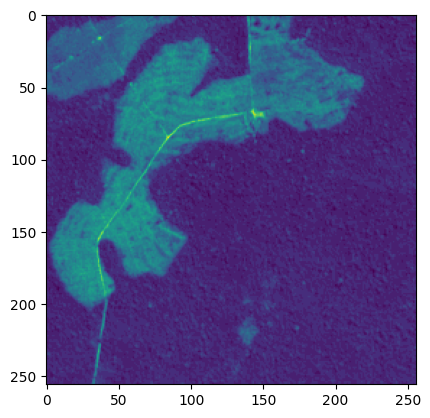

(256, 256)


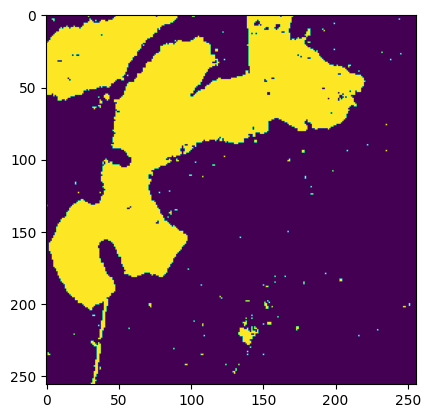

In [ ]:

import cv2
path0='/content/drive/MyDrive/SIH_DETECTION/sample_data/images/deforestation_0.png'
img0=cv2.imread(path0,cv2.IMREAD_GRAYSCALE)
shape0=img0.shape
print(shape0)
plt.imshow(img0)
plt.show()

path1='/content/drive/MyDrive/SIH_DETECTION/sample_data/masks/deforestation_0.png'
img1=cv2.imread(path1,cv2.IMREAD_GRAYSCALE)
shape1=img1.shape
print(shape1)
plt.imshow(img1)
plt.show()

In [ ]:
df["mask_path"] = mask_df["mask_path"]
df


,image_path,mask_path
id,,
deforestation_8,/content/drive/MyDrive/SIH_DETECTION/sample_da...,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_7,/content/drive/MyDrive/SIH_DETECTION/sample_da...,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_3,/content/drive/MyDrive/SIH_DETECTION/sample_da...,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_2,/content/drive/MyDrive/SIH_DETECTION/sample_da...,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_6,/content/drive/MyDrive/SIH_DETECTION/sample_da...,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_5,/content/drive/MyDrive/SIH_DETECTION/sample_da...,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_10,/content/drive/MyDrive/SIH_DETECTION/sample_da...,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_4,/content/drive/MyDrive/SIH_DETECTION/sample_da...,/content/drive/MyDrive/SIH_DETECTION/sample_da...
deforestation_1,/content/drive/MyDrive/SIH_DETECTION/sample_da...,/content/drive/MyDrive/SIH_DETECTION/sample_da...


In [ ]:
n = len(df)
print(n)
test_df = df.iloc[(n//10)*3:(n//10)*4]
print(test_df)

11
                                                        image_path  \
id                                                                   
deforestation_2  /content/drive/MyDrive/SIH_DETECTION/sample_da...   

                                                         mask_path  
id                                                                  
deforestation_2  /content/drive/MyDrive/SIH_DETECTION/sample_da...  


In [ ]:

img_size = [256,256] #new input size

def data_augmentation(car_img, mask_img):
    if tf.random.uniform(()) > 0.5:
        car_img = tf.image.flip_left_right(car_img)
        mask_img = tf.image.flip_left_right(mask_img)

    return car_img, mask_img

def preprocessing(image_path, mask_path):
    car_img = tf.io.read_file(image_path)
    car_img = tf.image.decode_png(car_img, channels=3)
    car_img = tf.image.resize(car_img, img_size)
    car_img = tf.cast(car_img, tf.float32) / 255.0

    mask_img = tf.io.read_file(mask_path)
    mask_img = tf.image.decode_png(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]
    mask_img = tf.math.sign(mask_img)

    return car_img, mask_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["image_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["image_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)

    return ds

In [ ]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.25)
train = create_dataset(train_df, train = True)
valid = create_dataset(valid_df)
test = create_dataset(test_df)


TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 16
BUFFER_SIZE = 1000


train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)
test_dataset = test.batch(BATCH_SIZE)

In [ ]:

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)
test_dataset = test.batch(BATCH_SIZE)


def display(display_list):
    plt.figure(figsize=(12,12))
    title = ['Input',' Mask','Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()


for i in range(5):
    for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = True

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
    ]


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = True

In [ ]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:

def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, activation='sigmoid',
      padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)


In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

model = unet_model(1)

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics=[dice_coef,'binary_accuracy'])

#tf.keras.utils.plot_model(model, show_shapes=True)

NameError: ignored

In [ ]:
def visualize(display_list):
    plt.figure(figsize=(12,12))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask])


for i in range(5):
    for images, masks in train_dataset.take(i):
        for img, mask in zip(images, masks):
            sample_image = img
            sample_mask = mask
            show_predictions(sample_image, sample_mask)
            break

Output hidden; open in https://colab.research.google.com to view.

Epoch 1/40
1/1 [==============================] - 27s 27s/step - loss: 0.7237 - dice_coef: 0.2763 - binary_accuracy: 0.5707 - val_loss: 0.6555 - val_dice_coef: 0.3445 - val_binary_accuracy: 0.6133
Epoch 2/40
1/1 [==============================] - 0s 215ms/step


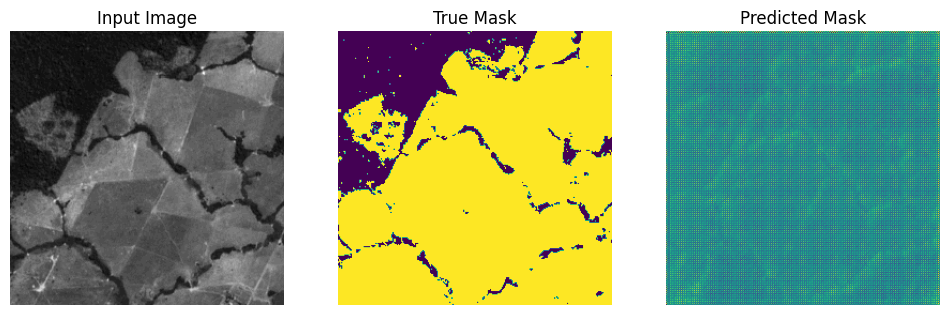

Epoch 3/40
1/1 [==============================] - 5s 5s/step - loss: 0.6093 - dice_coef: 0.3907 - binary_accuracy: 0.6700 - val_loss: 0.6489 - val_dice_coef: 0.3511 - val_binary_accuracy: 0.4924
Epoch 4/40
1/1 [==============================] - 4s 4s/step - loss: 0.5745 - dice_coef: 0.4255 - binary_accuracy: 0.6855 - val_loss: 0.6587 - val_dice_coef: 0.3413 - val_binary_accuracy: 0.4965
Epoch 5/40
1/1 [==============================] - 0s 226ms/step


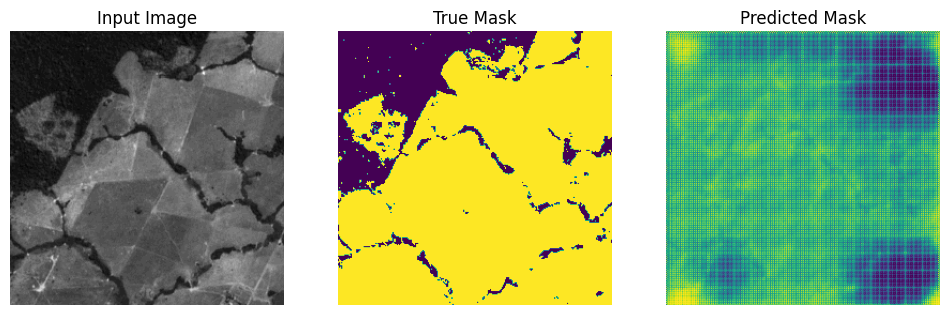

Epoch 6/40
1/1 [==============================] - 5s 5s/step - loss: 0.5346 - dice_coef: 0.4654 - binary_accuracy: 0.6792 - val_loss: 0.6260 - val_dice_coef: 0.3740 - val_binary_accuracy: 0.3300
Epoch 7/40
1/1 [==============================] - 4s 4s/step - loss: 0.5193 - dice_coef: 0.4807 - binary_accuracy: 0.6765 - val_loss: 0.5924 - val_dice_coef: 0.4076 - val_binary_accuracy: 0.3090
Epoch 8/40
1/1 [==============================] - 0s 143ms/step


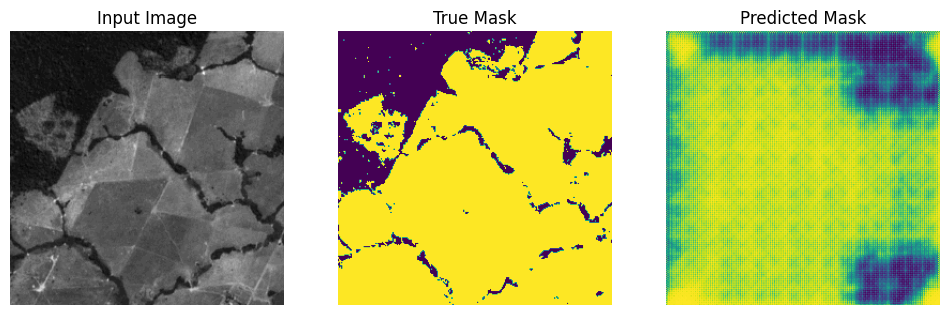

Epoch 9/40
1/1 [==============================] - 6s 6s/step - loss: 0.4782 - dice_coef: 0.5218 - binary_accuracy: 0.7312 - val_loss: 0.6118 - val_dice_coef: 0.3882 - val_binary_accuracy: 0.3387
Epoch 10/40
1/1 [==============================] - 4s 4s/step - loss: 0.4579 - dice_coef: 0.5421 - binary_accuracy: 0.7440 - val_loss: 0.6011 - val_dice_coef: 0.3989 - val_binary_accuracy: 0.3447
Epoch 11/40
1/1 [==============================] - 4s 4s/step - loss: 0.4390 - dice_coef: 0.5610 - binary_accuracy: 0.7500 - val_loss: 0.5950 - val_dice_coef: 0.4050 - val_binary_accuracy: 0.3628


In [ ]:
for i in range(8):
    for images, masks in test_dataset.take(i):
        for img, mask in zip(images, masks):
            tsample_image = img
            tsample_mask = mask
            show_predictions(tsample_image, tsample_mask)
            break

Output hidden; open in https://colab.research.google.com to view.